**ALUNOS: DAVID SMITH SOUZA, GUSTAVO CADORE DA SILVA, LUCAS RODRIGUES PINHEIRO, PEDRO HENRIQUE SOUZA DOS SANTOS E SAMUEL CESARIO PEREIRA TRIZOTTO DE ANDRADE**

##**Projeto 1 - RGB**


In [ ]:

import numpy as np
import cv2
import sys
from random import randint as randi
from tqdm import tqdm
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
import pickle

def bgr2hex(bgr):
    return "#%02x%02x%02x" % (int(bgr[2]), int(bgr[1]), int(bgr[0]))

def ScatterPlot(img, centroids, clusterLabels, plotNameOut="scatterPlot2.png"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            ax.scatter(img[x, y, 2], img[x, y, 1], img[x, y, 0],
                       color=bgr2hex(centroids[clusterLabels[x, y]]), s=5)
    plt.savefig(plotNameOut)
    plt.show()

def ShowCluster(img, centroids, clusterLabels, imgNameOut="out.png"):
    result = np.zeros((img.shape), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bgr = centroids[clusterLabels[i, j]]
            result[i, j, 0] = np.uint8(bgr[0])
            result[i, j, 1] = np.uint8(bgr[1])
            result[i, j, 2] = np.uint8(bgr[2])
    cv2.imwrite(imgNameOut, result)

    ScatterPlot(img, centroids, clusterLabels, plotNameOut="scatterPlot.png")

    cv2_imshow(result)

def GetEuclideanDistance(Cbgr, Ibgr):
    b = float(Cbgr[0]) - float(Ibgr[0])
    g = float(Cbgr[1]) - float(Ibgr[1])
    r = float(Cbgr[2]) - float(Ibgr[2])
    return sqrt(b*b + g*g + r*r)

def KMeans3D(img, k=2, max_iterations=100, imgNameOut="out.png"):
    Clusters = k
    centroids = np.zeros((k, 3), dtype=np.float64)
    for i in range(Clusters):
        x = randi(0, img.shape[0]-1)
        y = randi(0, img.shape[1]-1)
        centroids[i] = img[x, y].astype(np.float64)

    print("Centroids:\n", centroids)
    ClusterLabels = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    for i in range(max_iterations):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                MinDist = sys.float_info.max
                for c in range(Clusters):
                    dist = GetEuclideanDistance(centroids[c], img[x, y])
                    if dist <= MinDist:
                        MinDist = dist
                        ClusterLabels[x, y] = c

        MeanCluster = np.zeros((Clusters, 4), dtype=np.float64)
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                clusterNumber = ClusterLabels[x, y]
                MeanCluster[clusterNumber, 0] += 1
                MeanCluster[clusterNumber, 1] += float(img[x, y, 0])
                MeanCluster[clusterNumber, 2] += float(img[x, y, 1])
                MeanCluster[clusterNumber, 3] += float(img[x, y, 2])

        copy = np.copy(centroids)
        for c in range(Clusters):
            if MeanCluster[c, 0] != 0:
                centroids[c, 0] = MeanCluster[c, 1] / MeanCluster[c, 0]
                centroids[c, 1] = MeanCluster[c, 2] / MeanCluster[c, 0]
                centroids[c, 2] = MeanCluster[c, 3] / MeanCluster[c, 0]

        if np.array_equal(copy, centroids):
            break

    ShowCluster(img, centroids, ClusterLabels, imgNameOut)

ImageNames = ["2apples.jpg", "2or4objects.jpg", "colors.jpg"]
No = 1
Image = cv2.imread(ImageNames[No])
Image = cv2.resize(Image, None, fx=0.25, fy=0.25)
print("Image Size:", Image.shape)

KMeans3D(Image, k=6, max_iterations=10, imgNameOut="img_out2.png")

error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/resize.cpp:4208: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


#**Metodo Cotevelo (RGB)**

Tamanho da imagem: (133, 175, 3)
Calculando para k=1...
Calculando para k=2...
Calculando para k=3...
Calculando para k=4...
Calculando para k=5...


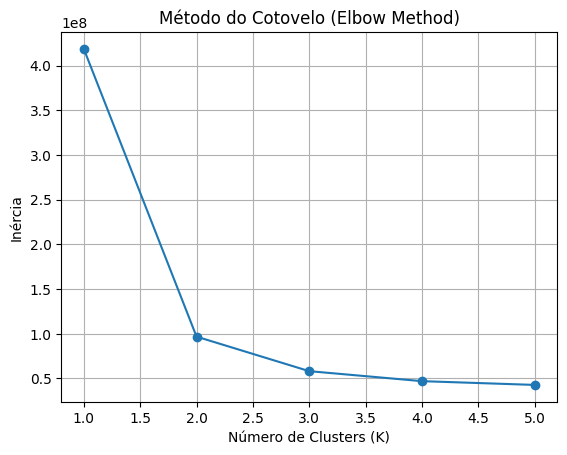

In [ ]:
import numpy as np
import cv2
import sys
from random import randint as randi
from tqdm import tqdm
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
import pickle


def bgr2hex(bgr):
    return "#%02x%02x%02x" % (int(bgr[2]), int(bgr[1]), int(bgr[0]))


def ScatterPlot(img, centroids, clusterLabels, plotNameOut="scatterPlot2.png"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            ax.scatter(img[x, y, 2], img[x, y, 1], img[x, y, 0],
                       color=bgr2hex(centroids[clusterLabels[x, y]]), s=5)
    plt.savefig(plotNameOut)
    plt.show()


def ShowCluster(img, centroids, clusterLabels, imgNameOut="out.png"):
    result = np.zeros((img.shape), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bgr = centroids[clusterLabels[i, j]]
            result[i, j, 0] = np.uint8(bgr[0])
            result[i, j, 1] = np.uint8(bgr[1])
            result[i, j, 2] = np.uint8(bgr[2])
    cv2.imwrite(imgNameOut, result)

    ScatterPlot(img, centroids, clusterLabels, plotNameOut="scatterPlot.png")

    cv2_imshow(result)


def GetEuclideanDistance(Cbgr, Ibgr):
    b = float(Cbgr[0]) - float(Ibgr[0])
    g = float(Cbgr[1]) - float(Ibgr[1])
    r = float(Cbgr[2]) - float(Ibgr[2])
    return sqrt(b*b + g*g + r*r)


def KMeans3D(img, k=2, max_iterations=100, imgNameOut="out.png"):
    Clusters = k
    centroids = np.zeros((k, 3), dtype=np.float64)
    for i in range(Clusters):
        x = randi(0, img.shape[0]-1)
        y = randi(0, img.shape[1]-1)
        centroids[i] = img[x, y].astype(np.float64)

    print("Centroids iniciais:\n", centroids)
    ClusterLabels = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    for i in range(max_iterations):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                MinDist = sys.float_info.max
                for c in range(Clusters):
                    dist = GetEuclideanDistance(centroids[c], img[x, y])
                    if dist <= MinDist:
                        MinDist = dist
                        ClusterLabels[x, y] = c

        MeanCluster = np.zeros((Clusters, 4), dtype=np.float64)
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                clusterNumber = ClusterLabels[x, y]
                MeanCluster[clusterNumber, 0] += 1
                MeanCluster[clusterNumber, 1] += float(img[x, y, 0])
                MeanCluster[clusterNumber, 2] += float(img[x, y, 1])
                MeanCluster[clusterNumber, 3] += float(img[x, y, 2])

        copy = np.copy(centroids)
        for c in range(Clusters):
            if MeanCluster[c, 0] != 0:
                centroids[c, 0] = MeanCluster[c, 1] / MeanCluster[c, 0]
                centroids[c, 1] = MeanCluster[c, 2] / MeanCluster[c, 0]
                centroids[c, 2] = MeanCluster[c, 3] / MeanCluster[c, 0]

        if np.array_equal(copy, centroids):
            break

    ShowCluster(img, centroids, ClusterLabels, imgNameOut)


def KMeans3D_Inertia(img, k=2, max_iterations=100):
    Clusters = k
    centroids = np.zeros((k, 3), dtype=np.float64)
    for i in range(Clusters):
        x = randi(0, img.shape[0]-1)
        y = randi(0, img.shape[1]-1)
        centroids[i] = img[x, y].astype(np.float64)

    ClusterLabels = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    for _ in range(max_iterations):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                MinDist = sys.float_info.max
                for c in range(Clusters):
                    dist = GetEuclideanDistance(centroids[c], img[x, y])
                    if dist < MinDist:
                        MinDist = dist
                        ClusterLabels[x, y] = c

        MeanCluster = np.zeros((Clusters, 4), dtype=np.float64)
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                clusterNumber = ClusterLabels[x, y]
                MeanCluster[clusterNumber, 0] += 1
                MeanCluster[clusterNumber, 1] += float(img[x, y, 0])
                MeanCluster[clusterNumber, 2] += float(img[x, y, 1])
                MeanCluster[clusterNumber, 3] += float(img[x, y, 2])

        copy = np.copy(centroids)
        for c in range(Clusters):
            if MeanCluster[c, 0] != 0:
                centroids[c, 0] = MeanCluster[c, 1] / MeanCluster[c, 0]
                centroids[c, 1] = MeanCluster[c, 2] / MeanCluster[c, 0]
                centroids[c, 2] = MeanCluster[c, 3] / MeanCluster[c, 0]

        if np.array_equal(copy, centroids):
            break

    inertia = 0
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            c = ClusterLabels[x, y]
            inertia += GetEuclideanDistance(centroids[c], img[x, y])**2

    return inertia

def ElbowMethod(img, max_k=10):
    inertias = []
    Ks = range(1, max_k + 1)

    for k in Ks:
        print(f"Calculando para k={k}...")
        inertia = KMeans3D_Inertia(img, k=k, max_iterations=10)
        inertias.append(inertia)

    plt.plot(Ks, inertias, marker='o')
    plt.title('Método do Cotovelo (Elbow Method)')
    plt.xlabel('Número de Clusters (K)')
    plt.ylabel('Inércia')
    plt.grid(True)
    plt.show()

ImageNames = ["2apples.jpg", "2or4objects.jpg", "colors.jpg"]
No = 1
Image = cv2.imread(ImageNames[No])
Image = cv2.resize(Image, None, fx=0.25, fy=0.25)
print("Tamanho da imagem:", Image.shape)

ElbowMethod(Image, max_k=5)



#**Projeto 1 - RGBXY**

Image Size: (133, 175, 3)
Centroids:
 [[224. 212. 212.  91.   1.]
 [ 31. 170. 151.  63.  49.]
 [127. 226. 214.  56.  30.]
 [ 38. 181. 172.  58. 107.]
 [ 11.  80.  77.  84. 146.]]


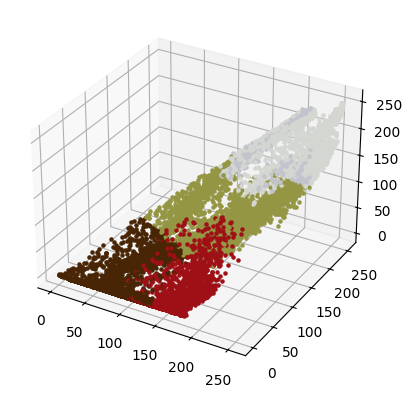

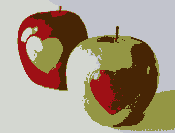

In [ ]:
import numpy as np
import cv2
import sys
from random import randint as randi
from tqdm import tqdm
from math import sqrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from google.colab.patches import cv2_imshow
import pickle

def bgr2hex(bgr):
    return "#%02x%02x%02x" % (int(bgr[2]), int(bgr[1]), int(bgr[0]))

def ScatterPlot(img, centroids, clusterLabels, plotNameOut="scatterPlot2.png"):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            ax.scatter(img[x, y, 2], img[x, y, 1], img[x, y, 0],
                       color=bgr2hex(centroids[clusterLabels[x, y]]), s=5)
    plt.savefig(plotNameOut)
    plt.show()

def ShowCluster(img, centroids, clusterLabels, imgNameOut="out.png"):
    result = np.zeros((img.shape), dtype=np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            bgr = centroids[clusterLabels[i, j]]
            result[i, j, 0] = np.uint8(bgr[0])
            result[i, j, 1] = np.uint8(bgr[1])
            result[i, j, 2] = np.uint8(bgr[2])
    cv2.imwrite(imgNameOut, result)

    ScatterPlot(img, centroids, clusterLabels, plotNameOut="scatterPlot.png")

    cv2_imshow(result)

def GetEuclideanDistance(C, I):
    b = float(C[0]) - float(I[0])
    g = float(C[1]) - float(I[1])
    r = float(C[2]) - float(I[2])
    x = float(C[3]) - float(I[3])
    y = float(C[4]) - float(I[4])
    return sqrt(b*b + g*g + r*r + x*x + y*y)

def KMeans5D(img, k=2, max_iterations=100, imgNameOut="out.png"):
    Clusters = k
    centroids = np.zeros((k, 5), dtype=np.float64)
    for i in range(Clusters):
        x = randi(0, img.shape[0]-1)
        y = randi(0, img.shape[1]-1)
        b, g, r = img[x, y].astype(np.float64)
        centroids[i] = [b, g, r, float(x), float(y)]

    print("Centroids:\n", centroids)
    ClusterLabels = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

    for i in range(max_iterations):
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                MinDist = sys.float_info.max
                for c in range(Clusters):
                    Ibgrxy = np.array([float(img[x, y, 0]), float(img[x, y, 1]), float(img[x, y, 2]), float(x), float(y)])
                    dist = GetEuclideanDistance(centroids[c], Ibgrxy)
                    if dist <= MinDist:
                        MinDist = dist
                        ClusterLabels[x, y] = c


        MeanCluster = np.zeros((Clusters, 6), dtype=np.float64)
        for x in range(img.shape[0]):
            for y in range(img.shape[1]):
                clusterNumber = ClusterLabels[x, y]
                MeanCluster[clusterNumber, 0] += 1
                MeanCluster[clusterNumber, 1] += float(img[x, y, 0])
                MeanCluster[clusterNumber, 2] += float(img[x, y, 1])
                MeanCluster[clusterNumber, 3] += float(img[x, y, 2])
                MeanCluster[clusterNumber, 4] += float(x)
                MeanCluster[clusterNumber, 5] += float(y)

        copy = np.copy(centroids)
        for c in range(Clusters):
            if MeanCluster[c, 0] != 0:
                centroids[c, 0] = MeanCluster[c, 1] / MeanCluster[c, 0]
                centroids[c, 1] = MeanCluster[c, 2] / MeanCluster[c, 0]
                centroids[c, 2] = MeanCluster[c, 3] / MeanCluster[c, 0]
                centroids[c, 3] = MeanCluster[c, 4] / MeanCluster[c, 0]
                centroids[c, 4] = MeanCluster[c, 5] / MeanCluster[c, 0]

        if np.array_equal(copy, centroids):
            break

    ShowCluster(img, centroids, ClusterLabels, imgNameOut)

ImageNames = ["2apples.jpg", "2or4objects.jpg", "colors.jpg"]
No = 1
Image = cv2.imread(ImageNames[No])
Image = cv2.resize(Image, None, fx=0.25, fy=0.25)
print("Image Size:", Image.shape)

KMeans5D(Image, k=5, max_iterations=10, imgNameOut="img_out5D.png")

#**Metodo Cotovelo (RGBXY)**

Tamanho da imagem: (90, 134, 3)
Executando Método do Cotovelo...
K=2, Inércia=69981821.77
K=3, Inércia=58928440.10
K=4, Inércia=47388076.97
K=5, Inércia=32949340.46
K=6, Inércia=28579083.76


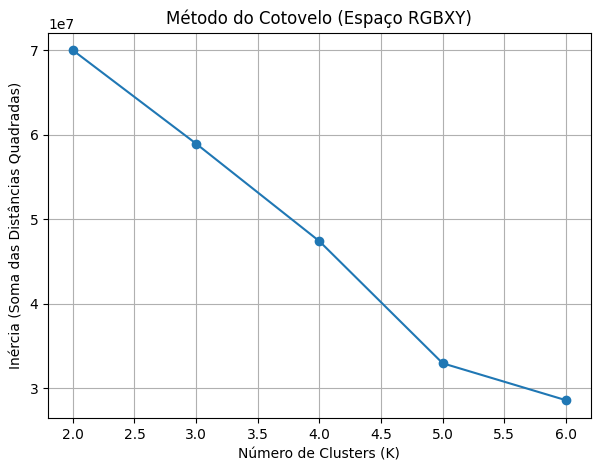

In [ ]:
import numpy as np
import cv2
from random import randint as randi
from math import sqrt
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def GetEuclideanDistance(C, I):
    return sqrt(np.sum((C - I) ** 2))

def KMeansRGBXY(img, k=3, max_iterations=50):
    h, w, _ = img.shape
    Clusters = k
    centroids = np.zeros((Clusters, 5), dtype=np.float64)

    for i in range(Clusters):
        x = randi(0, h - 1)
        y = randi(0, w - 1)
        b, g, r = img[x, y].astype(np.float64)
        centroids[i] = [b, g, r, float(x), float(y)]

    ClusterLabels = np.zeros((h, w), dtype=np.uint8)

    for iteration in range(max_iterations):
        for x in range(h):
            for y in range(w):
                pixel = np.array([float(img[x, y, 0]),
                                  float(img[x, y, 1]),
                                  float(img[x, y, 2]),
                                  float(x), float(y)])
                distances = np.sqrt(np.sum((centroids - pixel) ** 2, axis=1))
                ClusterLabels[x, y] = np.argmin(distances)

        new_centroids = np.zeros_like(centroids)
        counts = np.zeros(Clusters)

        for x in range(h):
            for y in range(w):
                c = ClusterLabels[x, y]
                b, g, r = img[x, y].astype(np.float64)
                new_centroids[c] += [b, g, r, float(x), float(y)]
                counts[c] += 1

        for c in range(Clusters):
            if counts[c] > 0:
                new_centroids[c] /= counts[c]

        if np.allclose(centroids, new_centroids, atol=1e-4):
            break
        centroids = new_centroids

    inertia = 0.0
    for x in range(h):
        for y in range(w):
            c = ClusterLabels[x, y]
            pixel = np.array([float(img[x, y, 0]),
                              float(img[x, y, 1]),
                              float(img[x, y, 2]),
                              float(x), float(y)])
            inertia += np.sum((centroids[c] - pixel) ** 2)

    return inertia, ClusterLabels, centroids


def ElbowMethodRGBXY(img, max_k=8):
    inertias = []
    K_values = range(2, max_k + 1)

    print("Executando Método do Cotovelo...")
    for k in K_values:
        inertia, _, _ = KMeansRGBXY(img, k=k, max_iterations=10)
        inertias.append(inertia)
        print(f"K={k}, Inércia={inertia:.2f}")

    plt.figure(figsize=(7, 5))
    plt.plot(K_values, inertias, marker='o')
    plt.title("Método do Cotovelo (Espaço RGBXY)")
    plt.xlabel("Número de Clusters (K)")
    plt.ylabel("Inércia (Soma das Distâncias Quadradas)")
    plt.grid(True)
    plt.show()

    return K_values, inertias

Image = cv2.imread("2apples.jpg")
Image = cv2.resize(Image, None, fx=0.25, fy=0.25)
print("Tamanho da imagem:", Image.shape)

K_values, inertias = ElbowMethodRGBXY(Image, max_k=6)


#**Projeto 2 - From Scratch**

In [ ]:
imagem = 'face2.jpg'

Imports

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Converte rgb para hsv pixel a pixel

In [ ]:
def converterRGBParaHSV(r, g, b):
    r_, g_, b_ = r / 255.0, g / 255.0, b / 255.0
    cmax = max(r_, g_, b_)
    cmin = min(r_, g_, b_)
    diff = cmax - cmin

    # Hue
    if diff == 0:
        h = 0
    elif cmax == r_:
        h = (60 * ((g_ - b_) / diff) + 360) % 360
    elif cmax == g_:
        h = (60 * ((b_ - r_) / diff) + 120) % 360
    else:
        h = (60 * ((r_ - g_) / diff) + 240) % 360

    # saturação
    s = 0 if cmax == 0 else (diff / cmax)

    # valor
    v = cmax

    return h, s, v

Converte RGB para YCBCR

In [ ]:
def converterRGBParaYCBCR(r, g, b):
    # Fórmulas padrão ITU-R BT.601
    y  = (0.299 * r) + (0.587 * g) + (0.114 * b)
    cb = 128 - (0.168736 * r) - (0.331264 * g) + (0.5 * b)
    cr = 128 + (0.5 * r) - (0.418688 * g) - (0.081312 * b)
    return y, cb, cr

Skin Threshold


In [ ]:

def skin_threshold(image_path):

    img_bgr = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    if img_bgr is None:
        raise ValueError("Erro ao carregar imagem.")

    height, width = img_bgr.shape[:2]

    # Se não houver canal alpha, cria um
    if img_bgr.shape[2] == 3:
        alpha_channel = np.ones((height, width, 1), dtype=np.uint8) * 255
        img = np.concatenate((img_bgr, alpha_channel), axis=2)
    else:
        img = img_bgr.copy()

    # Cria a máscara binária e imagem de saída
    mask_skin = np.zeros((height, width), dtype=np.uint8)
    skin_detected = np.zeros((height, width, 3), dtype=np.uint8)

    # proçessamento principal
    for y in range(height):
        for x in range(width):
            B, G, R, A = img[y, x]

            # Conversões de cor
            H, S, V = converterRGBParaHSV(R, G, B)
            Y, Cb, Cr = converterRGBParaYCBCR(R, G, B)

            # Condições baseadas no paper "Human Skin Detection Using RGB, HSV and YCbCr Color Models"
            # Condição 1 (HSV + RGB)

            cond1 = (
                (0.0 <= H <= 50.0) and
                (0.23 <= S <= 0.68) and
                (R > 95) and (G > 40) and (B > 20) and
                (R > G) and (R > B) and
                (abs(R - G) > 15) and (A > 15)
            )

            # Condição 2 (RGB + YCbCr)
            cond2 = (
                (R > 95) and (G > 40) and (B > 20) and
                (R > G) and (R > B) and
                (abs(R - G) > 15) and (A > 15) and
                (Cr > 135) and (Cb > 85) and (Y > 80) and
                (Cr <= (1.5862 * Cb) + 20) and
                (Cr >= (0.3448 * Cb) + 76.2069) and
                (Cr >= (-4.5652 * Cb) + 234.5652) and
                (Cr <= (-1.15 * Cb) + 301.75) and
                (Cr <= (-2.2857 * Cb) + 432.85)
            )

            # Classificação e mascaramento
            if cond1 or cond2:
                mask_skin[y, x] = 255                 # pixel de pele
                skin_detected[y, x] = [B, G, R]       # mantém a cor original
            else:
                mask_skin[y, x] = 0                   # não-pele
                skin_detected[y, x] = [0, 0, 0]       # preto (mascarado)

    # Converter para RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    skin_detected_rgb = cv2.cvtColor(skin_detected, cv2.COLOR_BGR2RGB)

    # resultados
    plt.figure(figsize=(15,6))
    plt.subplot(1,3,1); plt.imshow(img_rgb); plt.title("Imagem Original"); plt.axis("off")
    plt.subplot(1,3,2); plt.imshow(mask_skin, cmap='gray'); plt.title("Máscara de Pele (binária)"); plt.axis("off")
    plt.subplot(1,3,3); plt.imshow(skin_detected_rgb); plt.title("Imagem com Máscara Aplicada"); plt.axis("off")
    plt.show()

    return mask_skin, skin_detected_rgb





Utilização

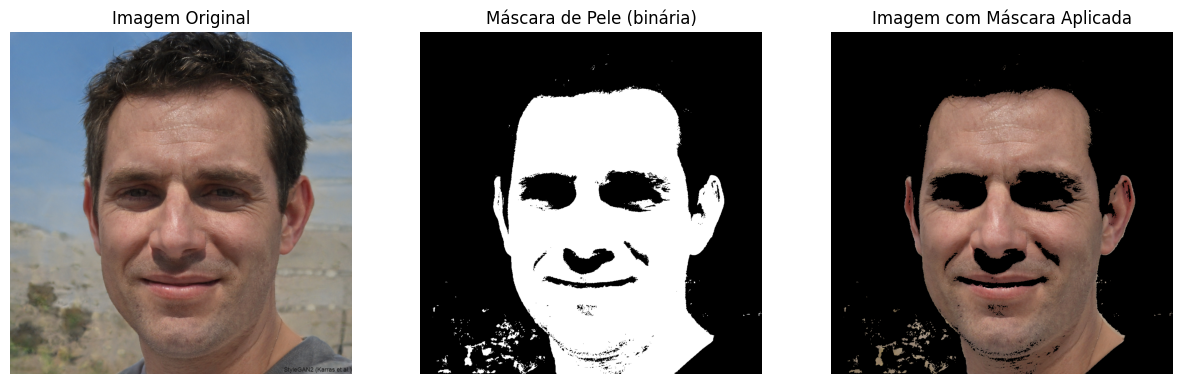

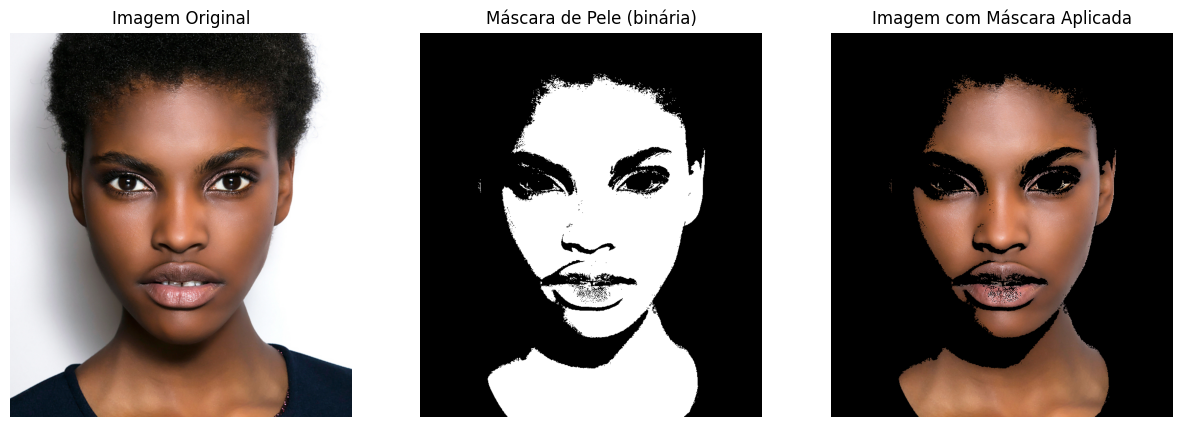

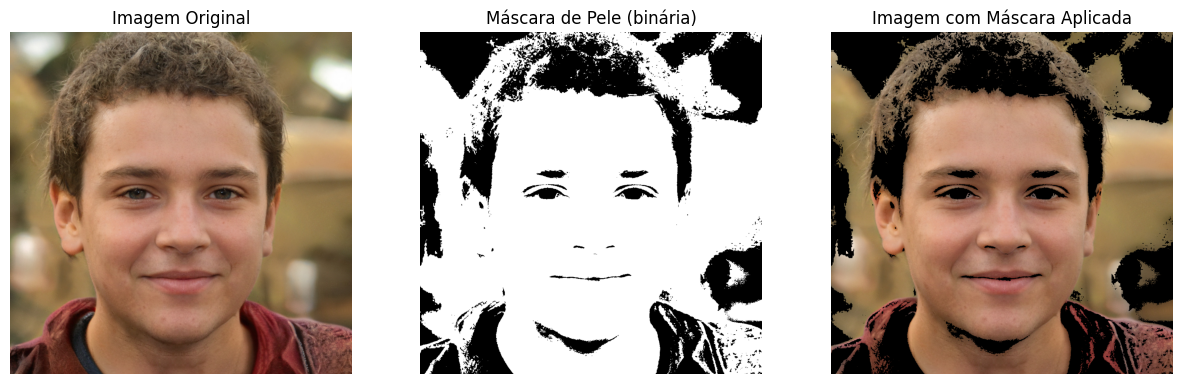

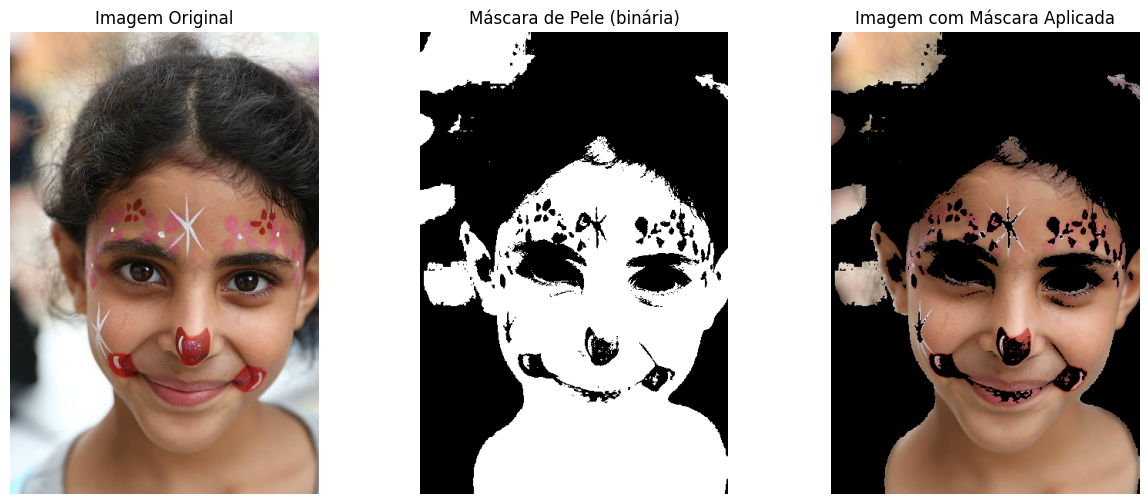

In [ ]:

mask, result = skin_threshold("/content/face1.jpg")
mask, result = skin_threshold("/content/face2.jpg")
mask, result = skin_threshold("/content/face3.jpeg")
mask, result = skin_threshold("/content/face4.jpg")

Seeded segmentation

Função que calcula as distancias entre pixeis

In [ ]:
def calculaDistancia(pixel, region_mean):
    """
    Calcula a distância Euclidiana entre dois vetores de cor BGR.
    Ambos os vetores devem ser arrays numpy de 3 elementos.
    """

    # Calcula a diferença para cada canal
    # (O [0] é o Azul, [1] é o Verde, [2] é o Vermelho, BGR)
    delta_b = pixel[0] - region_mean[0]
    delta_g = pixel[1] - region_mean[1]
    delta_r = pixel[2] - region_mean[2]

    # Calcula a soma dos quadrados das diferenças
    somaQuadrados = (delta_b ** 2) + (delta_g ** 2) + (delta_r ** 2)

    # raiz quadrada
    distancia = somaQuadrados ** 0.5

    return distancia

Implementação da seeded segmentation

In [ ]:

def seeded_segmentation(image_path, seed_point, tolerance=30):
    img = cv2.imread(image_path)
    img_float = img.astype(np.float32)
    h, w = img.shape[:2]
    mask = np.zeros((h, w), np.uint8)

    seed_x, seed_y = seed_point

    # Pega a cor do pixel semente e inicializa a média
    seed_color = img_float[seed_y, seed_x]

    # Variáveis para calcular a média de execução
    region_sum = seed_color.copy()
    region_count = 1.0
    region_mean = seed_color.copy()

    stack = [(seed_x, seed_y)]

    while stack:
        x, y = stack.pop()

        # Evita processar o mesmo pixel múltiplas vezes
        if mask[y, x] == 0:
            pixel = img_float[y, x]

            dist = calculaDistancia(pixel, region_mean)

            if dist < tolerance:
                mask[y, x] = 255

                # Atualiza a média
                region_sum += pixel
                region_count += 1
                region_mean = region_sum / region_count

                # Adiciona vizinhos  para explorar
                for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
                    nx, ny = x + dx, y + dy
                    # Verifica se o vizinho está dentro da imagem E não foi visitado
                    if (0 <= nx < w and 0 <= ny < h) and mask[ny, nx] == 0:
                        stack.append((nx, ny))

            # (Se o pixel for muito diferente, ele é ignorado e
            #  a média não é atualizada com ele)

    return mask

Aplica mascara

In [ ]:
def aplicaMascara(image_bgr, mask):
    h, w = mask.shape

    output_image = np.zeros_like(image_bgr)


    for y in range(h):
        for x in range(w):


            if mask[y, x] == 255:

                output_image[y, x] = image_bgr[y, x]

    return output_image


Processando imagem 1: /content/face1.jpg

Processando imagem 2: /content/face2.jpg

Processando imagem 3: /content/face3.jpeg

Processando imagem 4: /content/face4.jpg


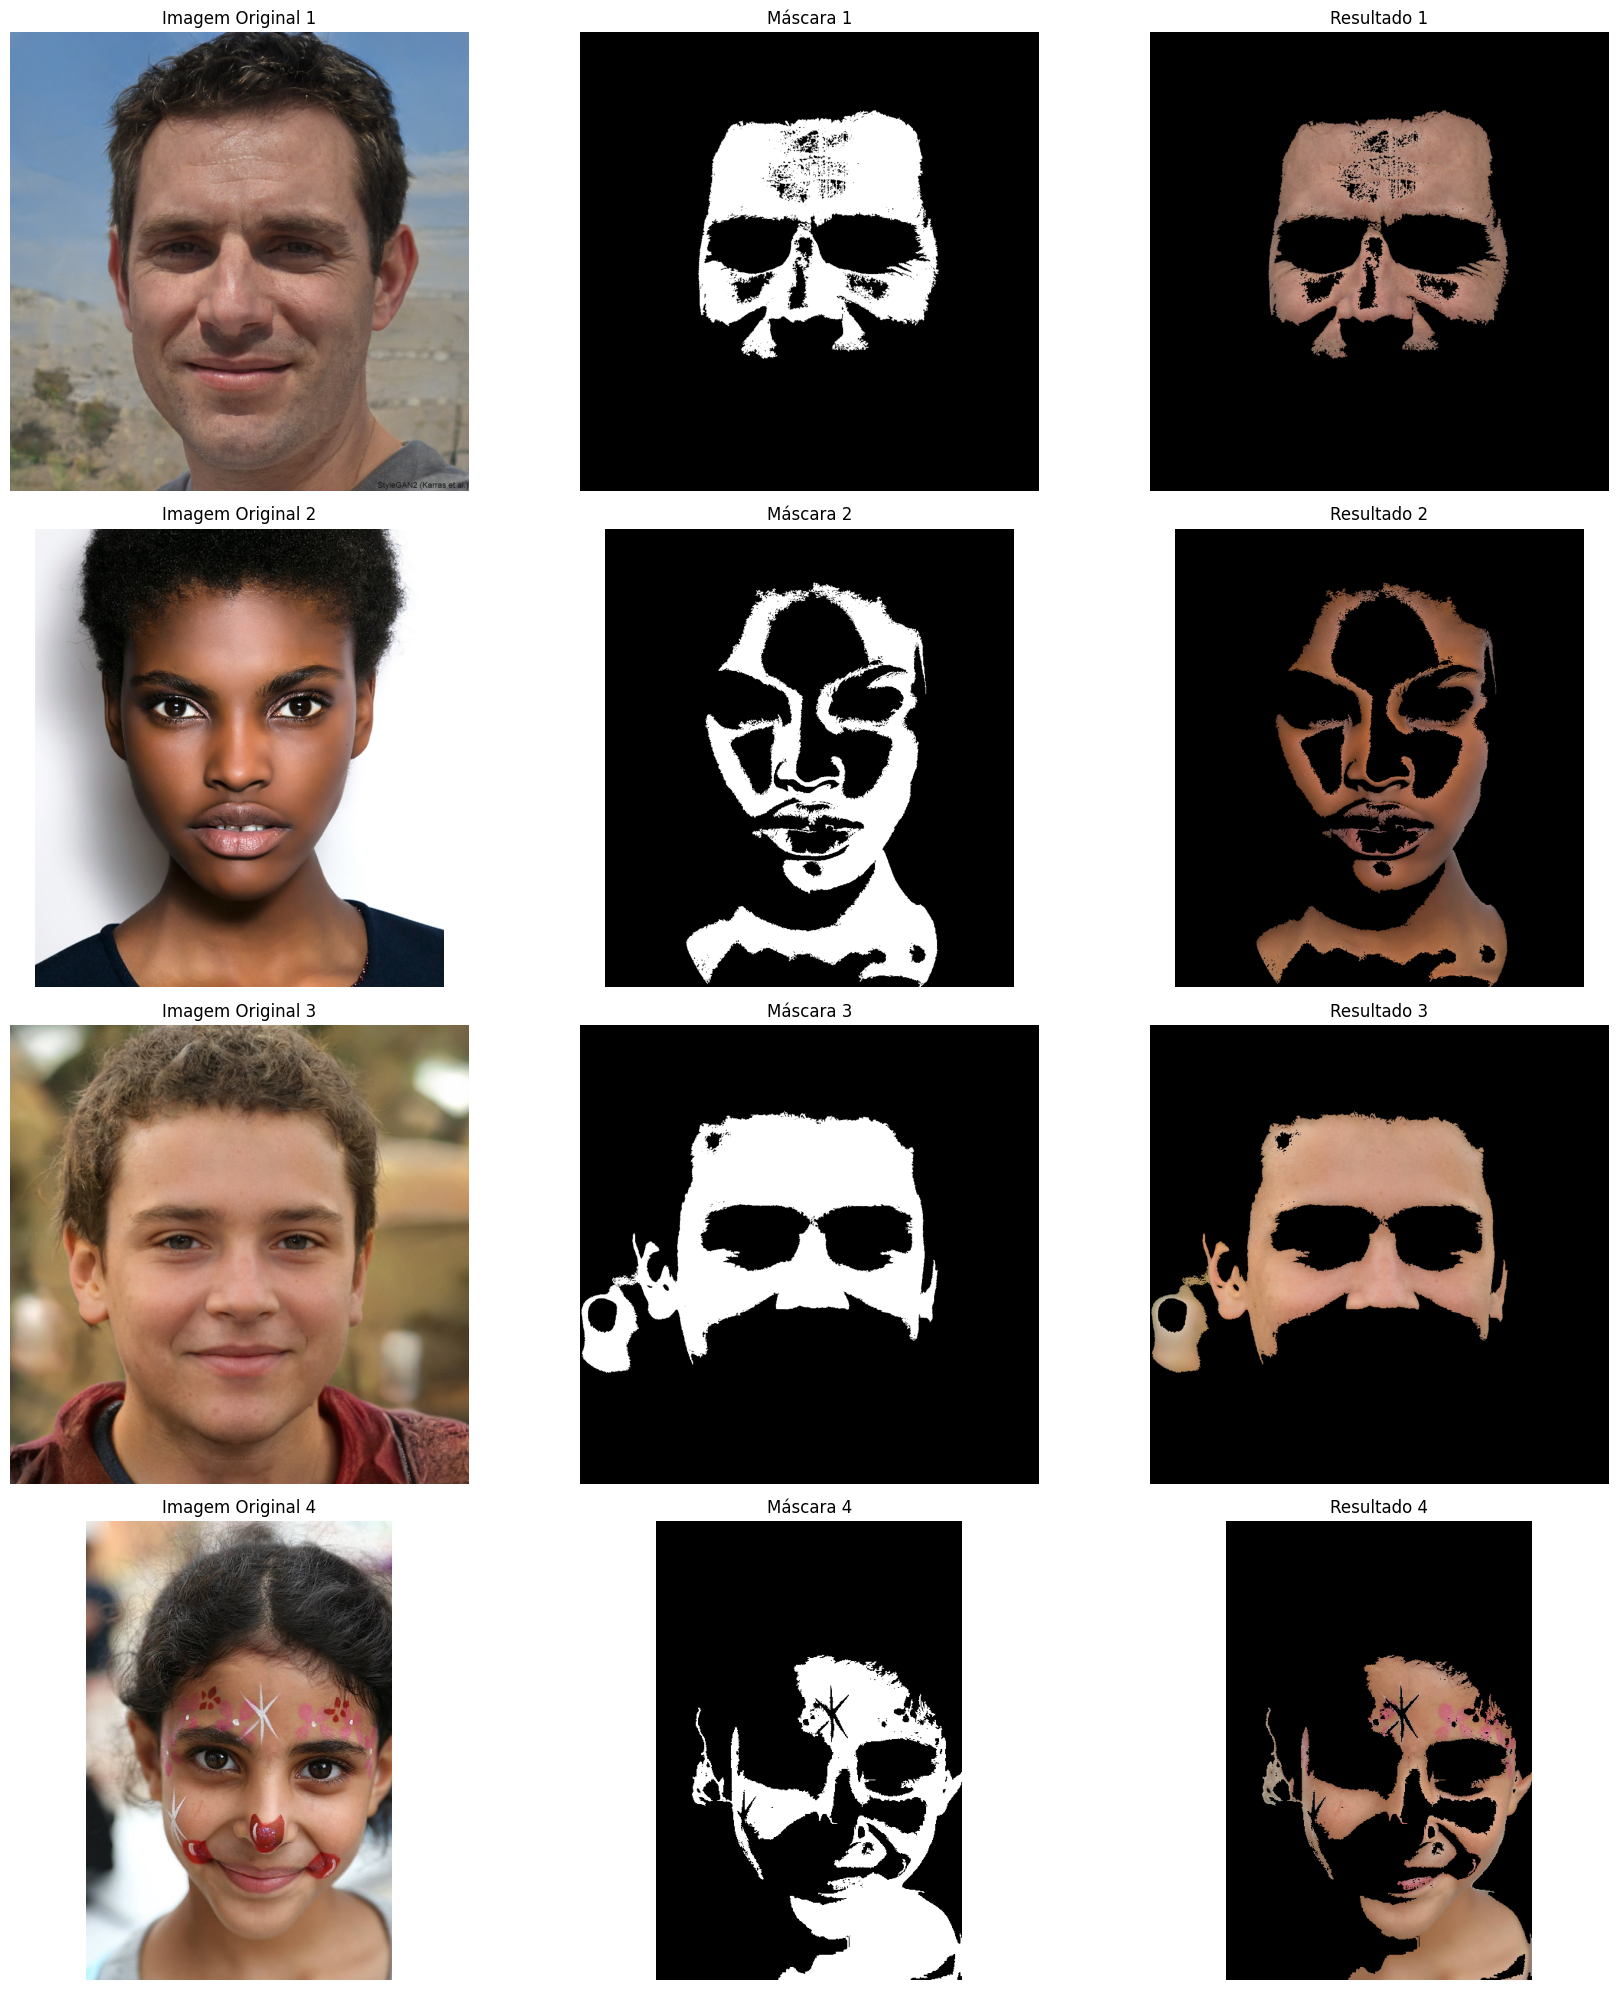

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Lista de imagens e pontos de semente correspondentes

imagens = [
    ("/content/face1.jpg", (517, 298)),
    ("/content/face2.jpg", (355, 615)),
    ("/content/face3.jpeg", (514, 312)),
    ("/content/face4.jpg", (223, 521))
]

resultados = []

# --- Processar todas as imagens
for idx, (image_path, (x, y)) in enumerate(imagens, start=1):
    print(f"\nProcessando imagem {idx}: {image_path}")

    adaptive_mask = adaptive_seeded_segmentation(image_path, (x, y), tolerance=50)

    if adaptive_mask is not None:
        img_bgr = cv2.imread(image_path)
        result_bgr = aplicaMascara(img_bgr, adaptive_mask)

        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        result_rgb = cv2.cvtColor(result_bgr, cv2.COLOR_BGR2RGB)

        resultados.append((idx, img_rgb, adaptive_mask, result_rgb))
    else:
        print(f"A segmentação falhou para a imagem {idx}.")

# --- Exibir todas as imagens processadas ---
if resultados:
    n = len(resultados)
    plt.figure(figsize=(18, 5 * n))

    for i, (idx, img_rgb, adaptive_mask, result_rgb) in enumerate(resultados):
        base = i * 3

        plt.subplot(n, 3, base + 1)
        plt.imshow(img_rgb)
        plt.title(f"Imagem Original {idx}")
        plt.axis('off')

        plt.subplot(n, 3, base + 2)
        plt.imshow(adaptive_mask, cmap='gray')
        plt.title(f"Máscara {idx}")
        plt.axis('off')

        plt.subplot(n, 3, base + 3)
        plt.imshow(result_rgb)
        plt.title(f"Resultado {idx}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Nenhuma segmentação bem-sucedida foi encontrada.")
